## This notebook showcases entire data cleaning ,analysis , wrangling  and preparation technique for our recommendor Engine

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/home/anand/project_1/ML_projects/Recommendor_syst/flipkart_com-ecommerce_sample.csv")
data.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [3]:
def show(datafram):                                                       
    for i in datafram.columns:                                            
       disp =  print(datafram.loc[:,i],"\n")                              
    return disp 
show(data.head(4))

0    c2d766ca982eca8304150849735ffef9
1    7f7036a6d550aaa89d34c77bd39a5e48
2    f449ec65dcbc041b6ae5e6a32717d01b
3    0973b37acd0c664e3de26e97e5571454
Name: uniq_id, dtype: object 

0    2016-03-25 22:59:23 +0000
1    2016-03-25 22:59:23 +0000
2    2016-03-25 22:59:23 +0000
3    2016-03-25 22:59:23 +0000
Name: crawl_timestamp, dtype: object 

0    http://www.flipkart.com/alisha-solid-women-s-c...
1    http://www.flipkart.com/fabhomedecor-fabric-do...
2    http://www.flipkart.com/aw-bellies/p/itmeh4grg...
3    http://www.flipkart.com/alisha-solid-women-s-c...
Name: product_url, dtype: object 

0    Alisha Solid Women's Cycling Shorts
1    FabHomeDecor Fabric Double Sofa Bed
2                             AW Bellies
3    Alisha Solid Women's Cycling Shorts
Name: product_name, dtype: object 

0    ["Clothing >> Women's Clothing >> Lingerie, Sl...
1    ["Furniture >> Living Room Furniture >> Sofa B...
2    ["Footwear >> Women's Footwear >> Ballerinas >...
3    ["Clothing >> Women's Clothin

In [4]:
data.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [5]:
data.nunique()

uniq_id                    20000
crawl_timestamp              371
product_url                20000
product_name               12676
product_category_tree       6466
pid                        19998
retail_price                2247
discounted_price            2448
image                      18589
is_FK_Advantage_product        2
description                17539
product_rating                36
overall_rating                36
brand                       3499
product_specifications     18825
dtype: int64

In [6]:
data.product_rating.value_counts()

No rating available    18151
5                        620
4                        246
1                        171
3                        168
2                         80
4.5                       67
3.7                       51
4.2                       47
3.5                       45
4.3                       45
3.6                       25
4.7                       24
4.1                       24
2.5                       23
3.8                       23
4.8                       21
3.2                       20
3.3                       17
4.4                       16
3.9                       15
3.4                       13
2.3                       12
2.8                       11
2.7                       10
4.6                        9
2.2                        8
3.1                        7
2.4                        5
2.9                        5
1.5                        4
4.9                        4
1.7                        4
1.3                        4
2.6           

In [7]:
data.brand.isna().sum()

5864

In [8]:
data.drop(columns=["product_url","image"],inplace=True)

In [9]:
data.columns


Index(['uniq_id', 'crawl_timestamp', 'product_name', 'product_category_tree',
       'pid', 'retail_price', 'discounted_price', 'is_FK_Advantage_product',
       'description', 'product_rating', 'overall_rating', 'brand',
       'product_specifications'],
      dtype='object')

In [10]:
data.uniq_id

0        c2d766ca982eca8304150849735ffef9
1        7f7036a6d550aaa89d34c77bd39a5e48
2        f449ec65dcbc041b6ae5e6a32717d01b
3        0973b37acd0c664e3de26e97e5571454
4        bc940ea42ee6bef5ac7cea3fb5cfbee7
                       ...               
19995    7179d2f6c4ad50a17d014ca1d2815156
19996    71ac419198359d37b8fe5e3fffdfee09
19997    93e9d343837400ce0d7980874ece471c
19998    669e79b8fa5d9ae020841c0c97d5e935
19999    cb4fa87a874f715fff567f7b7b3be79c
Name: uniq_id, Length: 20000, dtype: object

In [11]:
data.product_rating.value_counts()

No rating available    18151
5                        620
4                        246
1                        171
3                        168
2                         80
4.5                       67
3.7                       51
4.2                       47
3.5                       45
4.3                       45
3.6                       25
4.7                       24
4.1                       24
2.5                       23
3.8                       23
4.8                       21
3.2                       20
3.3                       17
4.4                       16
3.9                       15
3.4                       13
2.3                       12
2.8                       11
2.7                       10
4.6                        9
2.2                        8
3.1                        7
2.4                        5
2.9                        5
1.5                        4
4.9                        4
1.7                        4
1.3                        4
2.6           

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_name             20000 non-null  object 
 3   product_category_tree    20000 non-null  object 
 4   pid                      20000 non-null  object 
 5   retail_price             19922 non-null  float64
 6   discounted_price         19922 non-null  float64
 7   is_FK_Advantage_product  20000 non-null  bool   
 8   description              19998 non-null  object 
 9   product_rating           20000 non-null  object 
 10  overall_rating           20000 non-null  object 
 11  brand                    14136 non-null  object 
 12  product_specifications   19986 non-null  object 
dtypes: bool(1), float64(2), object(10)
memory usage: 1.9+ MB


In [13]:
data.isna().sum()

uniq_id                       0
crawl_timestamp               0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [14]:
data.groupby('product_name').overall_rating.count().reset_index()

,product_name,overall_rating
0,109F Solid Women's Tunic,1
1,109f Checkered Women's Regular Skirt,1
2,11e Women Flats,1
3,1OAK Women's Floral Print Casual Shirt,1
4,1OAK Women's Polka Print Casual Shirt,1
...,...,...
12671,"youniqueshop Plastic, Stainless Steel Hand Juicer",1
12672,zDelhi.com Car Washer Z1 Ultra High Pressure W...,1
12673,zaidis data_cable USB Cable,1
12674,zasmina Slippers,2


In [15]:
data.brand.value_counts()

Allure Auto      469
Regular          313
Voylla           299
Slim             288
TheLostPuppy     229
                ... 
MUCHMORE           1
Nitra              1
Tiskal             1
DC Universe        1
TIGI BED HEAD      1
Name: brand, Length: 3499, dtype: int64

In [16]:
"""
 Data Frame we required for making recommendation engine is based on the features as follows 
"""
features = ["uniq_id","product_rating","product_name","overall_rating","brand"]
data_rec = data[features]
data_rec

,uniq_id,product_rating,product_name,overall_rating,brand
0,c2d766ca982eca8304150849735ffef9,No rating available,Alisha Solid Women's Cycling Shorts,No rating available,Alisha
1,7f7036a6d550aaa89d34c77bd39a5e48,No rating available,FabHomeDecor Fabric Double Sofa Bed,No rating available,FabHomeDecor
2,f449ec65dcbc041b6ae5e6a32717d01b,No rating available,AW Bellies,No rating available,AW
3,0973b37acd0c664e3de26e97e5571454,No rating available,Alisha Solid Women's Cycling Shorts,No rating available,Alisha
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,No rating available,Sicons All Purpose Arnica Dog Shampoo,No rating available,Sicons
...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,No rating available,WallDesign Small Vinyl Sticker,No rating available,WallDesign
19996,71ac419198359d37b8fe5e3fffdfee09,No rating available,Wallmantra Large Vinyl Stickers Sticker,No rating available,Wallmantra
19997,93e9d343837400ce0d7980874ece471c,No rating available,Elite Collection Medium Acrylic Sticker,No rating available,Elite Collection
19998,669e79b8fa5d9ae020841c0c97d5e935,No rating available,Elite Collection Medium Acrylic Sticker,No rating available,Elite Collection


In [17]:
"""
 converting "no rating available" value in product_rating feature and overall rating to zero as
 we need numerical values for ML model building and numerical evaluation
""" 
def convert_prod_rat_zero(data_col):
    data_col = pd.to_numeric(data_col.replace('[^\d.]','',regex=True),errors='coerce')                                      
    data_col = data_col.fillna(0)
    data_col = data_col.astype("float32")
    return data_col
data_rec.product_rating = convert_prod_rat_zero(data_rec.product_rating)

In [18]:
data_rec.overall_rating = convert_prod_rat_zero(data_rec.overall_rating)
data_rec.head(5)

,uniq_id,product_rating,product_name,overall_rating,brand
0,c2d766ca982eca8304150849735ffef9,0.0,Alisha Solid Women's Cycling Shorts,0.0,Alisha
1,7f7036a6d550aaa89d34c77bd39a5e48,0.0,FabHomeDecor Fabric Double Sofa Bed,0.0,FabHomeDecor
2,f449ec65dcbc041b6ae5e6a32717d01b,0.0,AW Bellies,0.0,AW
3,0973b37acd0c664e3de26e97e5571454,0.0,Alisha Solid Women's Cycling Shorts,0.0,Alisha
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,0.0,Sicons All Purpose Arnica Dog Shampoo,0.0,Sicons


In [19]:
## Atleast for now drop the columns that contains null value.  ie ,brand
data_rec = data_rec.iloc[:,:-1]
data_rec

,uniq_id,product_rating,product_name,overall_rating
0,c2d766ca982eca8304150849735ffef9,0.0,Alisha Solid Women's Cycling Shorts,0.0
1,7f7036a6d550aaa89d34c77bd39a5e48,0.0,FabHomeDecor Fabric Double Sofa Bed,0.0
2,f449ec65dcbc041b6ae5e6a32717d01b,0.0,AW Bellies,0.0
3,0973b37acd0c664e3de26e97e5571454,0.0,Alisha Solid Women's Cycling Shorts,0.0
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,0.0,Sicons All Purpose Arnica Dog Shampoo,0.0
...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,0.0,WallDesign Small Vinyl Sticker,0.0
19996,71ac419198359d37b8fe5e3fffdfee09,0.0,Wallmantra Large Vinyl Stickers Sticker,0.0
19997,93e9d343837400ce0d7980874ece471c,0.0,Elite Collection Medium Acrylic Sticker,0.0
19998,669e79b8fa5d9ae020841c0c97d5e935,0.0,Elite Collection Medium Acrylic Sticker,0.0


In [20]:

prod_ratingcount = (data_rec.groupby("product_name").product_rating.count().
                  reset_index().rename(columns= {"product_rating":"total_rating_count"})
                [["product_name","total_rating_count"]])
                  
prod_ratingcount


,product_name,total_rating_count
0,109F Solid Women's Tunic,1
1,109f Checkered Women's Regular Skirt,1
2,11e Women Flats,1
3,1OAK Women's Floral Print Casual Shirt,1
4,1OAK Women's Polka Print Casual Shirt,1
...,...,...
12671,"youniqueshop Plastic, Stainless Steel Hand Juicer",1
12672,zDelhi.com Car Washer Z1 Ultra High Pressure W...,1
12673,zaidis data_cable USB Cable,1
12674,zasmina Slippers,2


In [21]:
prod_ratingcount.total_rating_count.value_counts().sort_values(ascending=False)


1      10643
2        962
3        427
4        193
5        102
6         78
7         41
8         34
9         26
11        22
10        18
12        15
14        11
16        11
13         9
20         8
19         6
17         6
15         6
37         5
21         5
25         4
18         4
22         3
32         3
26         3
28         2
39         2
36         2
23         2
31         2
42         2
30         2
134        1
27         1
94         1
45         1
29         1
52         1
44         1
35         1
65         1
66         1
58         1
50         1
95         1
33         1
24         1
40         1
43         1
Name: total_rating_count, dtype: int64

In [22]:
rating_with_total_rating = data_rec.merge(prod_ratingcount,left_on = 'product_name',
                                                        right_on = "product_name",how = 'left')
rating_with_total_rating.head()

,uniq_id,product_rating,product_name,overall_rating,total_rating_count
0,c2d766ca982eca8304150849735ffef9,0.0,Alisha Solid Women's Cycling Shorts,0.0,7
1,7f7036a6d550aaa89d34c77bd39a5e48,0.0,FabHomeDecor Fabric Double Sofa Bed,0.0,4
2,f449ec65dcbc041b6ae5e6a32717d01b,0.0,AW Bellies,0.0,1
3,0973b37acd0c664e3de26e97e5571454,0.0,Alisha Solid Women's Cycling Shorts,0.0,7
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,0.0,Sicons All Purpose Arnica Dog Shampoo,0.0,1


<AxesSubplot:xlabel='overall_rating', ylabel='Count'>

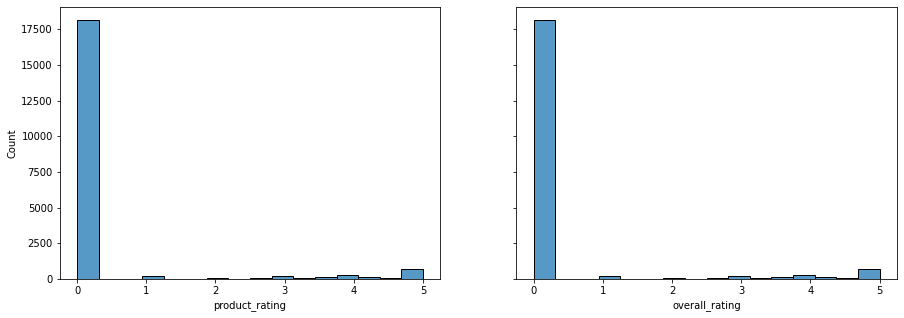

In [23]:
fig , axes = plt.subplots(1,2,figsize=(15,5),sharey=True)

sns.histplot(data_rec.product_rating,ax=axes[0])
sns.histplot(data_rec.overall_rating,ax=axes[1])

In [24]:
product_popularity_count = 20
popular_prod_rating = rating_with_total_rating.query("total_rating_count >= @product_popularity_count")
"""
 This can also written as 
 popular_prod_rating = rating_with_total_rating[rating_with_total_rating["total_rating_count"]>= product_popularity_count]
"""
popular_prod_rating

,uniq_id,product_rating,product_name,overall_rating,total_rating_count
95,f80ba21b9e77fe3a4d0e944f86305f8d,0.0,Reckler Slim Fit Men's Jeans,0.0,20
635,ab3a502f1d36c3deb4aefeab63a9cf9a,0.0,Navaksha Necktie Men's Combo,0.0,32
636,62b29ffa75ae615eacc04382ce733abd,0.0,Navaksha Necktie Men's Combo,0.0,32
637,8f06a7a986f85f68ff3927da34f56328,0.0,Navaksha Necktie Men's Combo,0.0,32
638,0dad330b790e1742af9c14a5d1e5cd4a,0.0,Navaksha Necktie Men's Combo,0.0,32
...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,0.0,WallDesign Small Vinyl Sticker,0.0,65
19996,71ac419198359d37b8fe5e3fffdfee09,0.0,Wallmantra Large Vinyl Stickers Sticker,0.0,24
19997,93e9d343837400ce0d7980874ece471c,0.0,Elite Collection Medium Acrylic Sticker,0.0,28
19998,669e79b8fa5d9ae020841c0c97d5e935,0.0,Elite Collection Medium Acrylic Sticker,0.0,28


In [25]:
popular_prod_rating.reset_index(inplace=True)

In [26]:
popular_prod_rating

,index,uniq_id,product_rating,product_name,overall_rating,total_rating_count
0,95,f80ba21b9e77fe3a4d0e944f86305f8d,0.0,Reckler Slim Fit Men's Jeans,0.0,20
1,635,ab3a502f1d36c3deb4aefeab63a9cf9a,0.0,Navaksha Necktie Men's Combo,0.0,32
2,636,62b29ffa75ae615eacc04382ce733abd,0.0,Navaksha Necktie Men's Combo,0.0,32
3,637,8f06a7a986f85f68ff3927da34f56328,0.0,Navaksha Necktie Men's Combo,0.0,32
4,638,0dad330b790e1742af9c14a5d1e5cd4a,0.0,Navaksha Necktie Men's Combo,0.0,32
...,...,...,...,...,...,...
2177,19995,7179d2f6c4ad50a17d014ca1d2815156,0.0,WallDesign Small Vinyl Sticker,0.0,65
2178,19996,71ac419198359d37b8fe5e3fffdfee09,0.0,Wallmantra Large Vinyl Stickers Sticker,0.0,24
2179,19997,93e9d343837400ce0d7980874ece471c,0.0,Elite Collection Medium Acrylic Sticker,0.0,28
2180,19998,669e79b8fa5d9ae020841c0c97d5e935,0.0,Elite Collection Medium Acrylic Sticker,0.0,28


In [27]:
popular_prod_rating.drop("index",axis=1,inplace=True)

In [28]:
data_rec.product_name.value_counts()

TheLostPuppy Back Cover for Apple iPad Air                                         134
TheLostPuppy Back Cover for Apple iPad Air 2                                        95
S4S Stylish Women's Push-up Bra                                                     94
Voylla Metal, Alloy Necklace                                                        66
WallDesign Small Vinyl Sticker                                                      65
                                                                                  ... 
Jewels5 Petra Gold Diamond 18 K Ring                                                 1
Gravolite Plain Yoga Blue 3 mm                                                       1
Parv Collections Showpiece  -  9 cm                                                  1
TRESemme Naturals Vibrantly Smooth Shampoo                                           1
Hako 45W Magsafe2 Laptop Charger For APPLE MacBook Air 13 MB003LLA 2 45 Adapter      1
Name: product_name, Length: 12676, dtype: i

#### Next step of numerical analysis to grasp a knowledge of how the product_rating is spread across different products.As initial thoughts are that these dataset is much skewed towards a content based Recommender system rather a collaborative based recommender system


In [29]:
uniq_prod = data_rec["product_name"].unique()
uniq_prod = pd.DataFrame({"Ind_product_name":uniq_prod})
uniq_prod

,Ind_product_name
0,Alisha Solid Women's Cycling Shorts
1,FabHomeDecor Fabric Double Sofa Bed
2,AW Bellies
3,Sicons All Purpose Arnica Dog Shampoo
4,Eternal Gandhi Super Series Crystal Paper Weig...
...,...
12671,Purple Women Heels
12672,Uberlyfe Large Vinyl Sticker
12673,We Witches Comfy Hues Women Wedges
12674,Stylistry Women Heels


In [30]:
prod_rating_wrt_name = data_rec.groupby("product_name").product_rating.value_counts().sort_values(ascending=False)
prod_rating_wrt_name

product_name                                                                              product_rating
TheLostPuppy Back Cover for Apple iPad Air                                                0.0               134
TheLostPuppy Back Cover for Apple iPad Air 2                                              0.0                95
S4S Stylish Women's Push-up Bra                                                           0.0                94
WallDesign Small Vinyl Sticker                                                            0.0                65
Voylla Metal, Alloy Necklace                                                              0.0                64
                                                                                                           ... 
Pearl Paradise Designer Collection - (T). Yellow Gold  K Pearl Alloy Drop Earring         0.0                 1
Pearl Paradise Dark Spot Yellow Gold Cubic Zirconia, Pearl Alloy Stud Earring             0.0                 1

In [31]:

data_rec.groupby("product_name").product_rating.agg('count').sort_values(ascending=False)

product_name
TheLostPuppy Back Cover for Apple iPad Air                                                                134
TheLostPuppy Back Cover for Apple iPad Air 2                                                               95
S4S Stylish Women's Push-up Bra                                                                            94
Voylla Metal, Alloy Necklace                                                                               66
WallDesign Small Vinyl Sticker                                                                             65
                                                                                                         ... 
Peepal Comm Bulb PC-USB_BULBO USB Led Light                                                                 1
Pedrini Steel Waiters Corkscrew                                                                             1
Peches by Peches Women's Balconette Bra                                                                    

In [32]:
popular_prod_rating.reset_index(inplace=True)
popular_prod_rating.drop("index",axis=1,inplace=True)

In [33]:
popular_prod_rating.sort_values(by='total_rating_count',ascending=False,inplace=True)

In [34]:
popular_prod_rating.reset_index(inplace=True)
popular_prod_rating.drop("index",axis=1,inplace=True)
popular_prod_rating

,uniq_id,product_rating,product_name,overall_rating,total_rating_count
0,9ea7d2943c34e481395957a81633efdf,0.0,TheLostPuppy Back Cover for Apple iPad Air,0.0,134
1,67788411870839f0117fd0e89fa1f2ce,0.0,TheLostPuppy Back Cover for Apple iPad Air,0.0,134
2,5fde9423d8472e89d0f6e412abc8c45e,0.0,TheLostPuppy Back Cover for Apple iPad Air,0.0,134
3,f6962409904c35651d024136de00183b,0.0,TheLostPuppy Back Cover for Apple iPad Air,0.0,134
4,a4c70b79f99f8299e8ef0b65e9c1e607,0.0,TheLostPuppy Back Cover for Apple iPad Air,0.0,134
...,...,...,...,...,...
2177,fcfad583e76a651200eca095895027e2,0.0,Vedika Jewellery Alloy Bangle Set,0.0,20
2178,8b7f2666638d5397a87bed42fd586788,0.0,Clovia Women's Full Coverage Bra,0.0,20
2179,4931aac7a49429b3509d62e4e8c431af,1.0,Clovia Women's Full Coverage Bra,1.0,20
2180,00b19f664f4de4ff19217cfe21a7b76b,2.0,Clovia Women's Full Coverage Bra,2.0,20


In [51]:
non_null_ratingData = data_rec[data_rec.product_rating >= 1]
non_null_ratingData.head(3)

,uniq_id,product_rating,product_name,overall_rating
10,e54bc0a7c3429da2ebef0b30331fe3d2,5.0,Ladela Bellies,5.0
27,bec784ef794cf596dbe2cbbaf5427ef0,3.0,Bulaky vanity case Jewellery Vanity Case,3.0
59,d620fa0d35825bb3c0717e9d3446cc97,3.6,Roadster Men's Zipper Solid Cardigan,3.6


 ### Now we can move onto to the recommender model building part of these project as for that we need to make use cosine similarity or cosine distance between individual products and build a sparse matrix out of it by make use of the pivot_table tool in pandas dataframe 